# Text Analysis and Visualization with Python and the NLTK

This notebook was originally prepared by Jonathan Reeve for use during a workshop called "An Introduction to Visualizing Text with Python," which took place during [Columbia's Art of Data Visualization week](http://library.columbia.edu/news/events/data-visualization.html) in April 2016. But you can run these commands yourself. To begin, you'll need this software: 

 * Python 3
 * These Python 3 packages (make sure you don't install their Python 2 versions): 
   - Jupyter (formerly called iPython Notebook) 
   - NLTK (the Natural Language Processing Toolkit) 
   - Pandas (a data science library) 
   - Wordcloud

There are lots of different ways to get this software. You can either install it on your computer, or run it in the cloud. Here are a few different ways of doing that. When you see text in a `monospace typeface`, those are commands to be entered in the terminal. On a Mac, open a terminal by typing "Terminal" into Spotlight. On Windows, press Win+R and type `cmd` to get a terminal.  

## Installation on Linux

1. Make sure your package list is up to date: `sudo apt-get update`
1. Get Python 3: `sudo apt-get install python3 python3-pip python3-pandas`
2. Get the Python packages: `sudo pip3 install jupyter nltk wordcloud`
3. Start a Jupyter notebook: `jupyter notebook`

## Installation on Mac or Windows: 

1. Get Anaconda with Python 3 from https://www.continuum.io/downloads
2. Anaconda comes with Pandas, NLTK, and Jupyter, so just install Wordcloud: `conda install --name wordcloud`
3. Start Jupyter Notebooks by clicking "launch" under "Jupyter Notebook." 
4. Make a new Python 3 Jupyter Notebook by clicking the menu "New," then "Python 3." 

One you have all the software installed, you can run the commands below either by copying and pasting them from this notebook, or by running them directly in this notebook, by downloading the notebook and opening it with jupyter (i.e. `jupyter notebook dataviz-workshop.ipynb`). 
-->

In [7]:
# Get the Natural Language Processing Toolkit
import nltk

In [8]:
# Get the data science package Pandas
import pandas as pd

# Get the library matplotlib for making pretty charts
import matplotlib
import matplotlib.pyplot as plt

# Make plots appear here in this notebook
%matplotlib inline

# This just makes the plot size bigger, so that we can see it easier. 
plt.rcParams['figure.figsize'] = (12,4)

# We'll use the OS module to download things. 
import os

## Work with our Own Text

In [9]:
# Download text version of BnF Ms Fr 640 transcription
os.system('./txt/all_tl.txt')

32256

In [18]:
# Tokenize it (break it into words), and make an NLTK Text object out of it. 
tlRaw = open('./txt/all_tl.txt').read()
tlWords = nltk.word_tokenize(tcRaw)
tl = nltk.Text(tcWords)

In [19]:
tl

<Text: 001r Master Nicolas Coste , in the Rue...>

## Exploring Texts

Let's explore the text a little. One thing we can do is look at statistically significant co-occurring two-word phrases, here known as *collocations*: 

In [12]:
tl.collocations()

sal ammoniac; spike lavender; aqua fortis; similar things; long time;
make sure; One needs; lavender oil; stone alum; iron wire; one needs;
box mold; looking-glass tin; one ounce; walnut oil; two ounces; one
ought; one side; even better; azur d’esmail


## Concordances and Dispersion Plots

Now let's look up an individual word in a text, and have NLTK give us some context: 

In [13]:
tl.concordance('flanders')

Displaying 10 of 10 matches:
ilter . Varnish resistant to water Flanders varnish , made with turpentine & o
ss It is said that in Lorraine and Flanders linking glass is made of fern ashe
e , which in my opinion is made in Flanders , tempered with clear turpentine &
 lake is better than the kind from Flanders for in Florence the best dyes are 
a christi seed oil . Walnut oil in Flanders costs at least a hundred sols a pi
 Casting The Germans use lead from Flanders because it is very soft . And to c
ody with ceruse & brazilwood dye . Flanders blue In the month of May , one put
o burrs remain , then varnish with Flanders varnish , which you make mixed wit
 , for an ounce is still gold . In Flanders , women make gild . It is more bea
e the blue of flowers florey or of Flanders & quicklime , and put in around fo


Not bad. But what if we want to see visually where those words occur over the course of the text? We can use the function `dispersion_plot`:

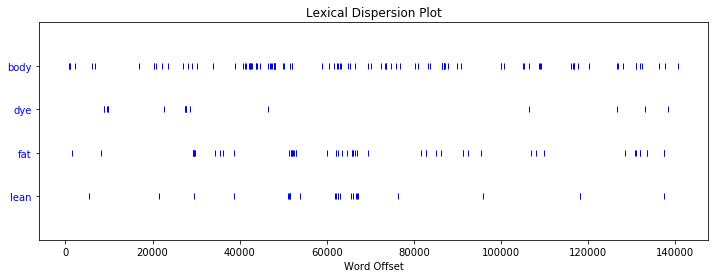

In [14]:
tl.dispersion_plot(['body', 'dye', 'fat', 'lean'])

## Measuring Text Vocabulary

We can use the `len` (length) function to count the total number of words in a text: 

In [15]:
len(tl)

141340

But word counts themselves are not very interesting, so let's see if we can not only count the words, 
but count the vocabulary of a text. To do that, we can use `set()`, which will count every word once. 

In [20]:
tl_words = tlRaw.split()
tl_words

['001r',
 'Master',
 'Nicolas',
 'Coste,',
 'in',
 'the',
 'Rue',
 'de',
 'la',
 'Heaumerie',
 ',',
 'at',
 'the',
 'sign',
 'of',
 'St',
 'Claude',
 '/',
 'Mirrors',
 'Master',
 'Jehan',
 'Cousin,',
 'who',
 'resides',
 'in',
 'the',
 'Faubourg',
 'St',
 'Germain',
 ',',
 'knows',
 'about',
 'the',
 'master',
 'Master',
 'Jehan',
 'Garnier,',
 'in',
 'the',
 'Rue',
 'des',
 'Escrivains',
 'by',
 'St',
 'Jacques',
 'de',
 'la',
 'Boucherie',
 ',',
 'currier',
 '.',
 'Try',
 'woad',
 'flowers',
 'The',
 'harvester',
 'that',
 'leaves',
 'some',
 'ears',
 'is',
 'not',
 'blamed.',
 'Sacra',
 'Eleusinae',
 'deae',
 'propalare',
 'nefas.',
 'Trumpets,',
 'see',
 'the',
 'book',
 'of',
 'funerals',
 'Vvolfangus',
 'Lazius',
 'Petrus',
 'Appianus',
 'mathematicus',
 'Ingolstadiensis,',
 'Comment.',
 'urb.',
 'rom.',
 'Hieronimo',
 'Ruscelli',
 'Hermolaus',
 'Barbarus',
 'Angelius',
 'Bargaeus,',
 'De',
 'aucupio',
 'et',
 'venatione',
 'Nicolaus',
 'Damascenus',
 'Caesariensis',
 ',',
 'De',

We can count the words in the sentence easily: 

In [15]:
len(tc_words)

251513

To count the words, but ignore repeated words, we can use the function set(). 

In [21]:
set(tl_words)

{'167v',
 'propalare',
 'cautiously',
 'agent',
 'tamen',
 'banners',
 'sixteen',
 'retail',
 'rim',
 'translation:',
 'liveliest',
 'padded',
 'shaft',
 'throws',
 'slides.',
 'horned',
 ',',
 'German',
 'month.',
 'd’esmail',
 'filth',
 'grapes',
 'eggs,',
 'lands',
 'Ears',
 '033r',
 'Lacking',
 'egg,',
 'merchandise',
 'plates.',
 'bittern',
 'forget',
 'Amaranth',
 'jec',
 'polished,',
 'rouges',
 'plucked',
 'drying,',
 'niello',
 'depths',
 'womb)',
 'Mouth',
 'intensely,',
 'because,',
 'day',
 'gilds',
 'Paindre',
 'frozen,',
 'obeys,',
 'hoist',
 'nicely',
 'feel',
 'ball,',
 'dwell',
 'pennyweight',
 'tables',
 'jerky',
 'harder',
 'glove',
 'filled',
 'chamber',
 'fits,',
 'right,',
 'silversmiths',
 'notches,',
 '55,',
 'wonderful.',
 'mine.',
 'castrate',
 'Cornelius',
 'Mark',
 'extremity',
 'fingers',
 'dangerous.',
 'strokes',
 'shots,',
 'morning',
 'quality',
 'tongs,',
 'in.',
 '164v',
 'animal',
 'fluted,',
 'sap.',
 'blamed',
 'hungs',
 'hairs',
 'Cereris',
 'gauc

So if we count this set, we can determine the vocabulary of a text:

In [17]:
len(set(tc_words))

11223

In [22]:
len(tc_words) / len(set(tc_words))

22.410496302236478

OK, now let's make a famous wordcloud from a text. This just takes the most statistically significant words, and plots them where the size of each word corresponds to its frequency. 

In [23]:
from wordcloud import WordCloud # Get the library

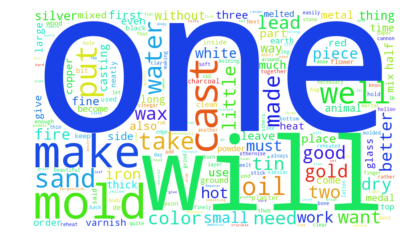

In [24]:
rawtext = ' '.join(tl.tokens) # Stitch it back together. 
wc = WordCloud(width=1000, height=600, background_color='white').generate(rawtext)
# This just makes the plot size bigger, so that we can see it easier. 
plt.rcParams['figure.figsize'] = (12,4)
plt.figure()
plt.axis('off')                          # Turn off axis ticks
plt.imshow(wc, interpolation="bilinear");# Plot it

# Plotting Words (Conditional Frequency Distributions)

Now let's take a look at the inaugural address corpus in detail. 

In [ ]:
from nltk.corpus import inaugural

We'll set up a conditional word frequency distribution for it, 
pairing off a list of words with the list of inaugural addresses. 

In [ ]:
plt.rcParams['figure.figsize'] = (14,5) # Adjust the plot size. 
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:4])
           for fileid in inaugural.fileids()
           for w in inaugural.words(fileid)
           for target in ['america', 'citizen']
           if w.lower().startswith(target))
cfd.plot()

You can replace the words 'america' and 'citizen' here with whatever words you want, to further explore this corpus.

Now let's play around with the Brown corpus. It's a categorized text corpus. Let's see all the categories: 

In [ ]:
nltk.corpus.brown.categories()

Now let's create another conditional frequency distribution, this time based on these genres. 

In [ ]:
genres = ['adventure', 'romance', 'science_fiction']
words = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in genres
              for word in nltk.corpus.brown.words(categories=genre)
              if word in words)

In [ ]:
cfdist

Finally, we can plot these words by genre: 

In [ ]:
pd.DataFrame(cfdist).T.plot(kind='bar')

Play around with this CFD a bit by changing the genres and words used above. 

# Further resources

To learn more, check out the NLTK book (from which a lot of the examples here were adapted): http://nltk.org/book

To see what's possible with more advanced techniques, using the [SpaCy](http://spacy.io) library, check out [my workshop notebook in advanced text analysis](https://github.com/JonathanReeve/advanced-text-analysis-workshop-2017/blob/master/advanced-text-analysis.ipynb). 

Read about some experiments in text analysis on my blog: http://jonreeve.com